# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# The Limitation of Linear Regression Which is Often Overlooked By Many

Post Link: [Substack](https://www.blog.dailydoseofds.com/p/the-limitation-of-linear-regression)

LinkedIn Post: [LinkedIn](https://www.linkedin.com/feed/update/urn:li:share:7072134634486083584/)

Twitter Post: [Twitter](https://twitter.com/_avichawla/status/1666368944582582272)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression, RANSACRegressor

sns.set()

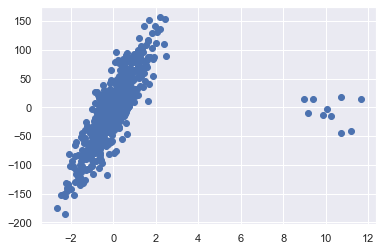

In [9]:
N_SAMPLES = 500
N_OUTLIERS = 10

X, y, coef = datasets.make_regression(
    n_samples=N_SAMPLES, 
    n_features=1, 
    n_informative=1, 
    noise=30, 
    coef=True, 
)

coef_list = [["original_coef", float(coef)]]

X[:N_OUTLIERS] = 10 + 0.75 * np.random.normal(size=(N_OUTLIERS, 1))
y[:N_OUTLIERS] = -15 + 20 * np.random.normal(size=N_OUTLIERS)

plt.scatter(X, y);

## Linear Regression

In [10]:
lr = LinearRegression().fit(X, y)
coef_list.append(["linear_regression", lr.coef_[0]])

In [11]:
plotline_X = np.arange(X.min(), X.max()).reshape(-1, 1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)

In [12]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF', '#FF7051', "orange", "darkorange", "tomato", "coral", "limegreen", "lightsalmon"]

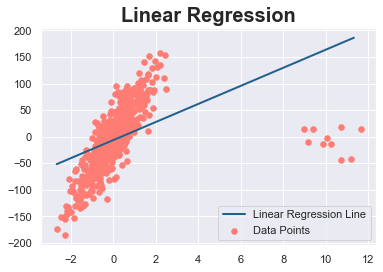

In [13]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax, y = "linear_regression", c = colors[8], lw=2, label="Linear Regression Line")
plt.scatter(X, y, c = colors[0], s = 30,  label = "Data Points")
plt.legend()
plt.title("Linear Regression", fontsize=20, fontweight = "bold")
plt.show();

## RANSAC Regression

In [14]:
ransac = RANSACRegressor().fit(X, y)
fit_df["ransac_regression"] = ransac.predict(plotline_X)
ransac_coef = ransac.estimator_.coef_
coef_list.append(["ransac_regression", ransac.estimator_.coef_[0]])

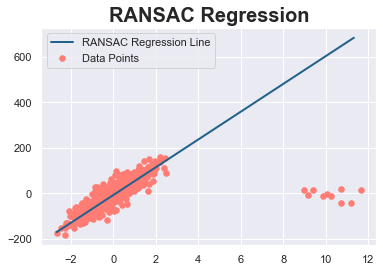

In [15]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax, y = "ransac_regression", c = colors[8], lw=2, label="RANSAC Regression Line")
plt.scatter(X, y, c = colors[0], s = 30, label = "Data Points")
plt.legend()
plt.title("RANSAC Regression", fontsize=20, fontweight = "bold")

plt.show();